import significa “traer una herramienta externa al programa”.
numpy (abreviado como np) es una librería (un conjunto de herramientas) que permite trabajar con matemática avanzada, especialmente arreglos y matrices.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.neighbors import LocalOutlierFactor

“sklearn” (scikit-learn) es una librería de inteligencia artificial y machine learning.
Dentro de ella está el módulo “neighbors”.
Dentro de “neighbors” está la clase LocalOutlierFactor, que es un algoritmo que sirve para detectar puntos raros, también llamados outliers.
¿Qué es un outlier?
Un dato que “se sale del grupo”, que está lejos de los demás. Por ejemplo, si todos pesan 70–80 kilos y alguien pesa 200, es un outlier.

In [4]:
np.random.seed(42)

Configura el generador de números aleatorios para que siempre produzca los mismos valores.
Porque si tu programa genera puntos al azar, no podrás repetir exactamente los mismos resultados cada vez que lo ejecutes.
Con seed(42) aseguramos:
siempre salen los mismos datos aleatorios

el ejemplo es reproducible

el gráfico no cambia cada vez

In [5]:
# Generamos los datos de entrenamiento

El símbolo # inicia un comentario, es decir: una nota para el humano, no para la computadora.
Aquí el comentario # Generamos los datos de entrenamiento No se ejecuta. Solo explica qué se hará en las siguientes líneas de codigo

In [6]:
X_inliers = 0.3 * np.random.randn(100, 2)

np.random.randn(100,2) Es un generador de números aleatorios que siguen una distribución normal (también llamada campana de Gauss).
genera 100 filas
cada una de las filas con 2 números
los números siguen una distribución normal con media 0 y desviación estándar 1
¿Por qué hacemos 0.3 * ...? Porque queremos que los puntos estén más juntos y centrados.
Multiplicar los valores aleatorios por 0.3:
reduce su tamaño

hace que el grupo de puntos sea más compacto

evita que se dispersen demasiado en el gráfico
Antes una fila: [-1.2 0.7] Después de multiplicar x 0.3: [-0.36 0.21]. Mucho más cerca del origen.
¿Qué significa X_inliers = ...? Estamos guardando los resultados en una variable llamada X_inliers.
El nombre viene de:
inlier → punto normal, punto dentro del grupo

lo contrario de outlier, que es un punto raro o externo
X_inliers es un grupo de 100 puntos normales, cada uno con 2 coordenadas (x, y).
Estos serán los datos “buenos” o “normales” del dataset.

In [7]:
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

Qué es X_inliers + 2?

A cada punto del arreglo, súmale 2 a las dos coordenadas:

Si un punto era: [-0.36, 0.21]. Entonces [-0.36 + 2, 0.21 + 2] = [1.64, 2.21]

PREGUNTA AL CURSO: ¿Qué es X_inliers - 2?

RESPUESTA: ¿Qué es X_inliers - 2? [-0.36, 0.21] → [-2.36, -1.79]

¿Qué hace np.r_[ ... , ... ]?

Es una función que une dos conjuntos de datos verticalmente.

Así: 
[ grupo desplazado +2 ] [ grupo desplazado -2 ]

Resultado: una sola matriz con 200 filas.

¿Por qué hacemos esto?

Generamos dos grupos de puntos “buenos”:

uno centrado alrededor de (2,2)

otro centrado alrededor de (-2,-2)

Estos dos grupos representarán datos normales.

In [8]:
# Generamos algunos outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

¿Qué es np.random.uniform()?

Es un generador de números aleatorios que elige valores entre dos límites:

low=-4 significa el valor mínimo posible es −4

high=4 significa el valor máximo posible es 4

Es como decir:

“Elige números entre −4 y 4”.

¿Qué significa size=(20, 2)?

Vamos a generar 20 puntos, donde cada punto tiene 2 coordenadas (x, y)

Entonces crea una matriz así:

[ [valor, valor], [valor, valor], ... 20 veces ] son puntos outliers

¿Por qué estos son outliers?

Porque estos puntos pueden caer en cualquier parte del cuadrado: x entre −4 y 4 y entre −4 y 4

Esto incluye puntos:

Lejos de los grupos normales

Totalmente dispersos

Con ubicaciones aleatorias

Son perfectos para representar “valores raros”.

In [9]:
X = np.r_[X_inliers, X_outliers]

In [10]:

n_outliers = len(X_outliers)

In [11]:
n_outliers

20

In [12]:
print(n_outliers)

20


In [13]:
ground_truth = np.ones(len(X), dtype=int)

la medicion real de lo que quiero modular esto es ground truth
len me da la longitud de x(X) → cuenta todos los puntos (inliers + outliers). ya juntos

200 inliers (100 deslpazados +2)

20 outliers

total = 220

np.ones(...) → crea un arreglo lleno de unos. un vector de 20 (1) [1, 1, 1, 1, 1, 1, ...]

dtype=int → asegura que sean números enteros.

POR QUÉ LO HACEMOS?

Estamos creando un arreglo que dice:

1 = punto normal (inlier)

−1 = punto raro (outlier)

Por ahora marcamos todos como normales, pero en la siguiente línea corregiremos eso.

In [14]:
ground_truth[-n_outliers:] = -1

ground_truth es una lista de 1s: [1, 1, 1, 1, ... 1]

-n_outliers: significa: “las últimassss n_outliers posiciones”, o sea, los últimos 20 elementos

Si hay 220 datos: tomamos los elementos 200 al 219 y les ponemos −1
n outliners ya guarde arriba como una costatnte de 20 las ultimas 20 elementos los va a tomar.

In [15]:
# Aquí vamos a entrenar el modelo para detectar puntos raros
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

¿Qué es LocalOutlierFactor?

Es un algoritmo que permite detectar puntos anormales analizando:

-qué tan cerca están de sus vecinos -qué tan denso es su “vecindario” -si están aislados o lejos del grupo principal

Es como observar: “Si un punto está solo, o alejado del grupo, probablemente es raro”.

¿Qué significa n_neighbors=20?

Este parámetro le dice al modelo: “Para decidir si un punto es raro, compáralo con sus 20 vecinos más cercanos”. Si un punto: está mucho más lejos de esos 20 vecinos o tiene un vecindario poco denso entonces LOF lo marcará como outlier.

¿Qué significa contamination=0.1?

Este parámetro indica: “Aproximadamente el 10% de los datos se espera que sean outliers”. Como tenemos: 200 puntos normales 20 puntos raros total = 220

20/220 = 0.09 → ~10%

El valor 0.1 es una buena aproximación.

OJO: Si no se especifica, LOF intenta estimarlo automáticamente, pero aquí lo indicamos manualmente.

In [16]:
# Usaremos fit_predict para obtener las etiquetas (normal o outlier). 
# LOF no permite predecir sobre datos nuevos cuando se usa como detector de outliers.
## LOF estudia densidades locales del conjunto completo
## Si le damos un nuevo punto, no sabe dónde encajarlo
## Para eso existe un modo especial llamado novelty=True (pero aquí no lo usaremos)
y_pred = clf.fit_predict(X)

In [19]:
n_errors = (y_pred != ground_truth).sum()

Primero, y_pred != ground_truth compara cada predicción con su valor verdadero. Cuando la predicción es distinta del valor real, el resultado es True (hay error), y cuando es igual, es False (acierto). Luego, al usar .sum(), se suman esos True y False como si fueran 1 y 0 respectivamente. Así, el resultado final es el número total de errores de clasificación. Ese valor se guarda en la variable n_errors.

In [20]:
X_scores = clf.negative_outlier_factor_

Esa línea guarda en la variable X_scores las puntuaciones de “atipico” que calculo el modelo LocalOutlierFactor

clf es tu modelo entrenado.
clf.negative_outlier_factor_ es un arreglo donde cada dato corresponde a una muestra del conjunto de datos y mide qué tan “atipico o raro es este valor”.

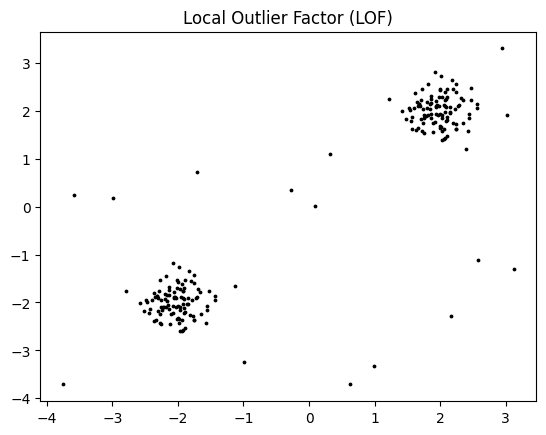

In [21]:
plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')
sc_points

Primero, plt.title("Local Outlier Factor (LOF)") pone el título de la figura. Luego, plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos') toma la primera columna de X como eje X y la segunda como eje Y, y dibuja cada par como un puntito negro pequeño. Ese conjunto de puntos se guarda en la variable sc_points para poder usarlo después, por ejemplo, al crear la leyenda de la gráfica.

In [22]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

Esa línea transforma las puntuaciones X_scores a valores entre 0 y 1 y los guarda en radius. Cuanto más “outlier” es un punto (peor X_scores), mayor será su valor en radius. Normalmente se usa para que los puntos más raros se vean más grandes al graficarlos.

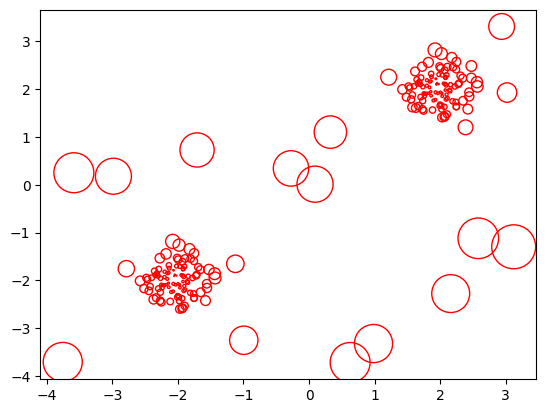

In [23]:
sc_circles = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
sc_circles

Esa línea dibuja círculos alrededor de cada punto donde el tamaño del círculo indica qué tan outlier es el punto. Usa radius para que los puntos más raros tengan círculos más grandes, los bordes son rojos, el interior transparente, y todo eso se guarda en sc_circles para usarlo después en la gráfica.

Text(0.5, 1.0, 'Local Outlier Factor (LOF)')

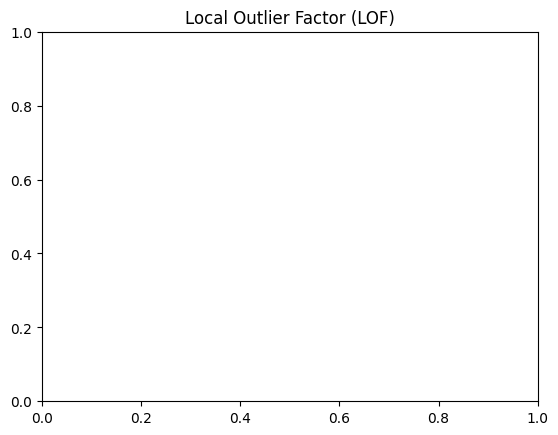

In [24]:
plt.title("Local Outlier Factor (LOF)")

Esa línea simplemente pone el título del gráfico.

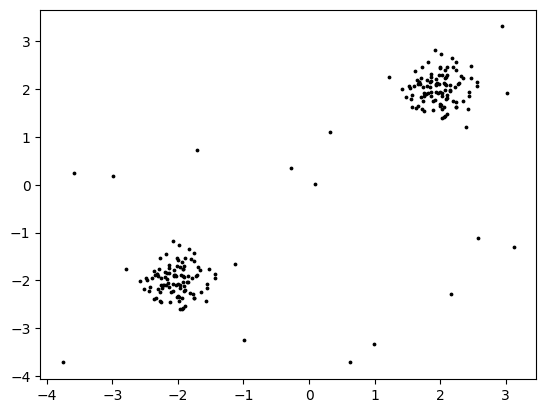

In [25]:
sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    label='Data points'
)

esta línea dibuja los puntos de tus datos en la gráfica.
Usa la primera columna de X como eje X y la segunda como eje Y, los pinta de color negro (color='k'), con tamaño pequeño (s=3), y les pone la etiqueta "Data points" para la leyenda.

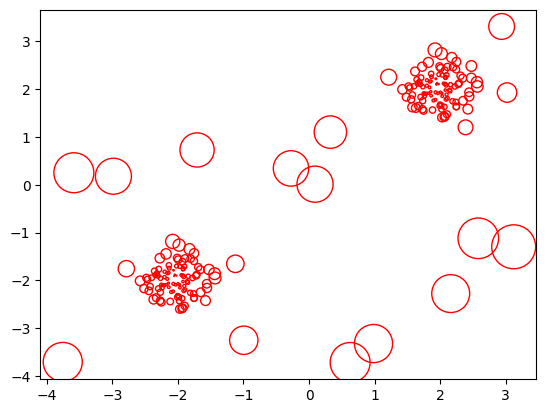

In [26]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)

Primero se convierte cada puntuación X_scores en un valor entre 0 y 1 y se guarda en radius, de modo que los puntos más outliers tengan valores más altos. Luego se dibujan círculos alrededor de los puntos usando ese radius para que los outliers tengan círculos rojos más grandes y visibles en la gráfica.

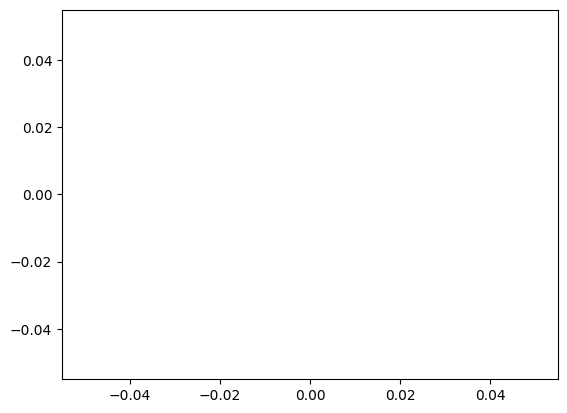

In [27]:
plt.autoscale()


Ajusta automáticamente los ejes de la gráfica para que todo lo dibujado se vea completo.

Text(0.5, 0, 'prediction errors: 8')

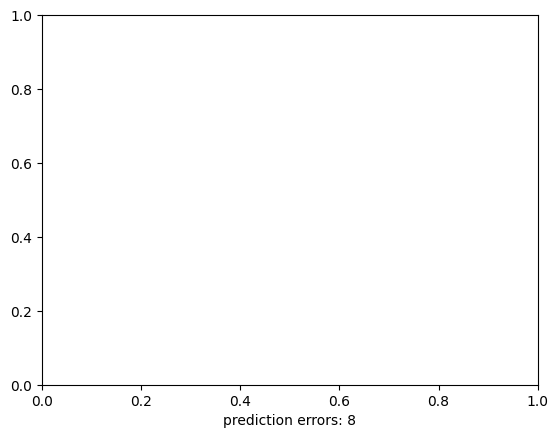

In [28]:
plt.xlabel(f"prediction errors: {n_errors}")


Esa línea pone el texto del eje X.
El rótulo será algo como: prediction errors: 5, usando el valor que tenga n_errors para mostrar cuántos errores de predicción hubo.

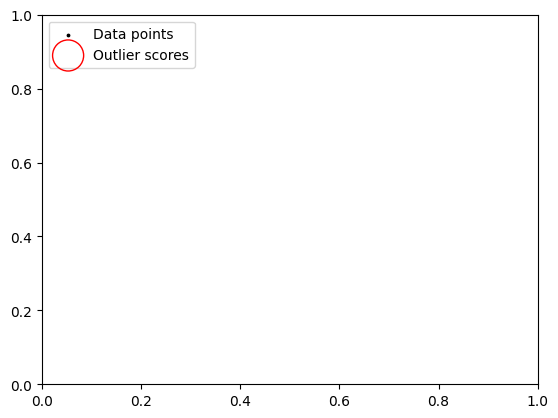

In [29]:
leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')

Esa línea crea la leyenda de la gráfica.
Usa sc_points y sc_circles como elementos de la leyenda, les pone los nombres "Data points" y "Outlier scores", y coloca la leyenda en la esquina superior izquierda (loc='upper left'). El objeto resultante se guarda en leg. plt.legend() sirve para mostrar la leyenda de la gráfica.

In [32]:
leg.legend_handles[0].set_sizes([30])
leg.legend_handles[1].set_sizes([90])

leg.legend_handles es la lista de elementos gráficos que la leyenda está mostrando; al usar leg.legend_handles[0].set_sizes([30]) se ajusta el tamaño del símbolo del primer elemento de la leyenda al valor 30, y con leg.legend_handles[1].set_sizes([90]) se ajusta el tamaño del símbolo del segundo elemento al valor 90. Estos cambios solo afectan cómo se ven los iconos en la leyenda, no el tamaño de los puntos o círculos dibujados en la gráfica principal.

In [35]:
plt.show()

plt.show() le dice a matplotlib que muestre la figura en pantalla. Es la instrucción final que abre la ventana (o la salida gráfica) con todos los gráficos que has ido construyendo antes; sin esta línea, en muchos entornos la gráfica no se llega a visualizar.

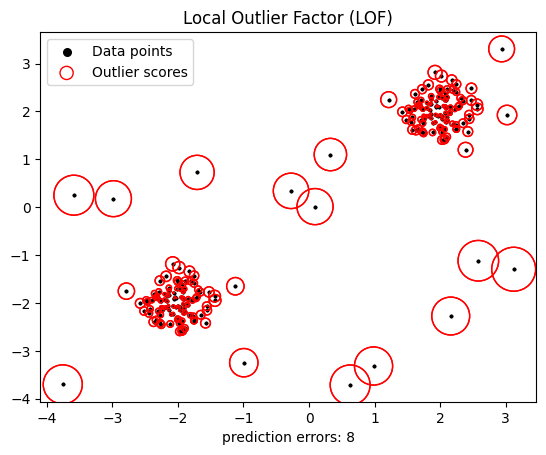

In [34]:
n_errors = (y_pred != ground_truth).sum()

X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')
sc_points

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())


sc_circles = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
sc_circles


plt.title("Local Outlier Factor (LOF)")


sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    label='Data points'
)


radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)


plt.autoscale()

plt.xlabel(f"prediction errors: {n_errors}")


leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')

leg.legend_handles[0].set_sizes([30])
leg.legend_handles[1].set_sizes([90])

plt.show()